# Preliminary Exploration

This notebook performs a preliminary exploration of the data (i.e what we have & what we may need).

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import sys
from sklearn.model_selection import train_test_split

sys.path.append('../data')
%matplotlib inline

In [2]:
# Reading the labels table & checking distribution of labels
labels = pd.read_csv('../data/driver_imgs_list.csv')
labels.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [3]:
# Checking how many examples we have
labels.shape

(22424, 3)

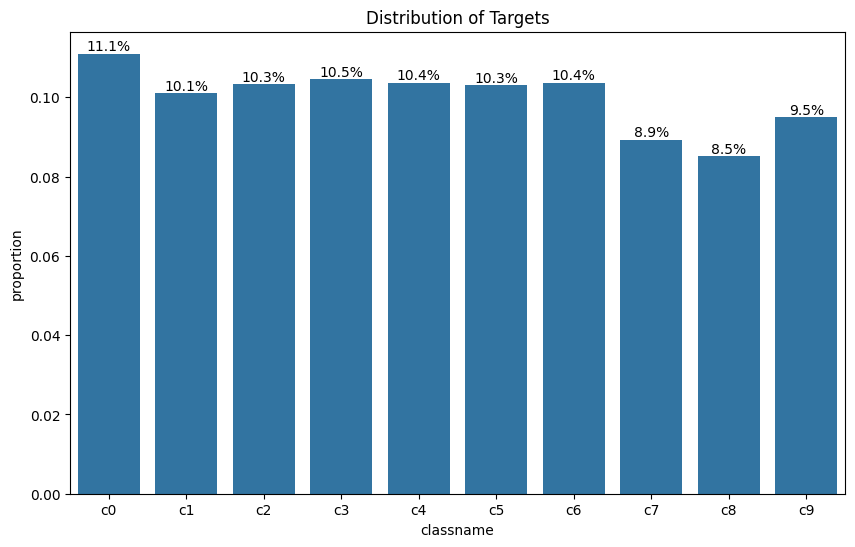

In [4]:
# Checking the target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=labels, x='classname', orient='x', stat='proportion')
plt.title('Distribution of Targets')

# Calculate proportions
total = len(labels)
for p in ax.patches:
    percentage = f'{100 * p.get_height():.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

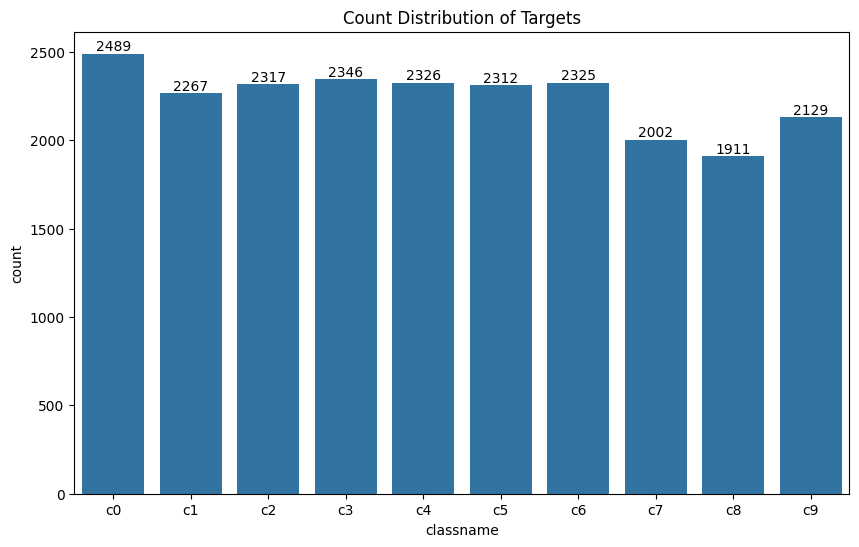

In [5]:
# Checking the count of the target distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=labels, x='classname', orient='x')
plt.title('Count Distribution of Targets')

# Calculate proportions
total = len(labels)
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='bottom')

plt.show()

img_9604.jpg
c3
texting - left
(480, 640, 3)


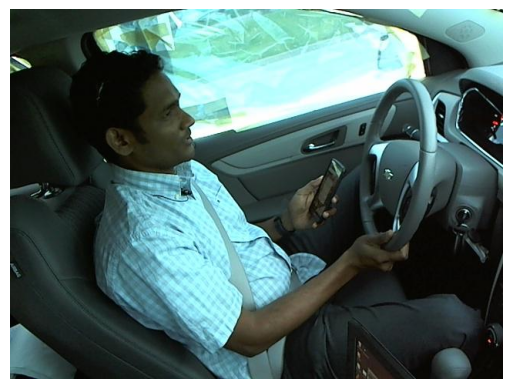

In [6]:
# Getting a random image
class_dicts = {'c0':'safe driving','c1':'texting - right','c2':'talking on the phone - right',
               'c3':'texting - left','c4':'talking on the phone - left','c5':'operating the radio',
               'c6':'drinking','c7':'reaching behind','c8':'hair and makeup','c9':'talking to passenger'}
class_label = np.random.choice(labels['classname'].unique())
random_example = np.random.choice(labels[labels['classname'] == class_label]['img'])
img = cv2.imread(f'../data/imgs/train/{class_label}/{random_example}')

# Converting the image to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plotting the image
print(random_example)
print(class_label)
print(class_dicts[class_label])
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
# Splitting data into training & testing (stratified by class label)
training,testing = train_test_split(labels, test_size=0.2, stratify=labels['classname'], random_state=42)

# Print the
training.shape, testing.shape

((17939, 3), (4485, 3))

In [8]:
# Checking the head of the training data
training.head()

,subject,classname,img
21215,p075,c5,img_75085.jpg
9396,p035,c1,img_24344.jpg
4915,p021,c4,img_58937.jpg
6235,p022,c4,img_26388.jpg
20435,p066,c9,img_33260.jpg


In [9]:
# Saving both the training and testing data
training.to_csv('../data/training.csv', index=False)
testing.to_csv('../data/validation.csv', index=False)